In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## Top 5 Bands in Anime Genre

In [3]:
# read and process the tracks dataset
tracks_df = pd.read_csv('data/japan_spotify_daily_charts_artists.csv')
tracks_df.head()

,artist_id,artist_name,total_followers,genres,popularity
0,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,19149394,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",80
1,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,45503730,"['canadian contemporary r&b', 'canadian pop', ...",91
2,540vIaP2JwjQb9dm3aArA4,DJ Snake,7845034,"['dance pop', 'edm', 'electronic trap', 'pop',...",77
3,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,40934353,"['dance pop', 'pop']",86
4,04gDigrS5kc9YWfZHwBETP,Maroon 5,36617385,['pop'],84


In [4]:
filtered_df = tracks_df[tracks_df['artist_name'].isin(['Official HIGE DANdism', 'Kenshi Yonezu', 'ENHYPEN', 'LiSA', 'Hikaru Utada'])]

In [5]:
filtered_df.drop_duplicates(subset='artist_id', inplace=True)
filtered_df.shape

C:\Users\Raymart L. Perillo\AppData\Local\Temp\ipykernel_10736\2993513049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop_duplicates(subset='artist_id', inplace=True)


(5, 5)

C:\Users\Raymart L. Perillo\AppData\Local\Temp\ipykernel_10736\3802366420.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1000000, 2000000, 3000000, 4000000])


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1000000'),
 Text(0, 2000000.0, '2000000'),
 Text(0, 3000000.0, '3000000'),
 Text(0, 4000000.0, '4000000'),
 Text(0, 5000000.0, '')]

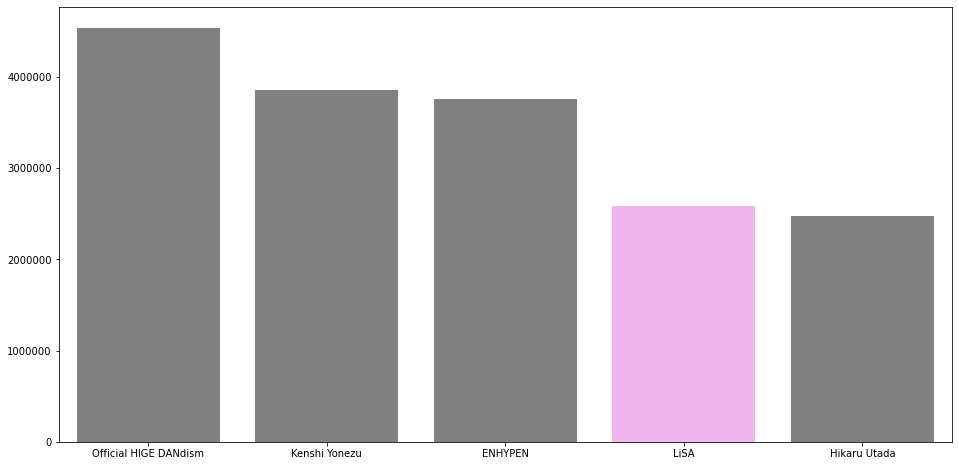

In [6]:
# Plot 
plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
sns.barplot(x='artist_name',
            y='total_followers', data=filtered_df,
            order=filtered_df.sort_values('total_followers',ascending = False).artist_name,
           palette=['grey', 'grey', 'grey', '#fbabf7', 'grey'])
plt.xlabel(None)
plt.ylabel(None)
ax.set_yticklabels([0, 1000000, 2000000, 3000000, 4000000])

## Time series

In [7]:
charts_df = pd.read_csv('data/japan_spotify_daily_charts.csv')
charts_df.head()

,Unnamed: 0,track_name,position,date,artist,streams,track_id
0,4626,Closer,1,2017-01-01,"The Chainsmokers, Halsey",6342.0,7BKLCZ1jbUBVqRi2FVlTVw
1,4627,I Feel It Coming,2,2017-01-01,"The Weeknd, Daft Punk",5697.0,5GXAXm5YOmYT0kL5jHvYBt
2,4628,Let Me Love You,3,2017-01-01,"DJ Snake, Justin Bieber",5149.0,4pdPtRcBmOSQDlJ3Fk945m
3,4629,24K Magic,4,2017-01-01,Bruno Mars,4846.0,6b8Be6ljOzmkOmFslEb23P
4,4630,Don't Wanna Know,5,2017-01-01,"Maroon 5, Kendrick Lamar",4595.0,5MFzQMkrl1FOOng9tq6R9r


In [8]:
collab = 0
non_collab = 0
for index, row in charts_df.iterrows():
    if ',' in row['artist']:
        collab += 1
    else:
        non_collab += 1
print(collab, non_collab)
print(charts_df.shape)

36357 320410
(356767, 7)


In [9]:
df = charts_df.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.drop(axis=1,columns='Unnamed: 0', inplace=True)

In [10]:
#get total yearly streams
yr_df = df['streams'].resample('Y').sum() #M for month
yr_df

date
2017-12-31    3.045158e+08
2018-12-31    6.414213e+08
2019-12-31    1.334215e+09
2020-12-31    3.298963e+09
2021-12-31    4.198201e+09
Freq: A-DEC, Name: streams, dtype: float64

In [11]:
lisa_df = df[df['artist'] == 'LiSA']
lisa_df.head()

,track_name,position,artist,streams,track_id
date,,,,,
2020-05-01,紅蓮華,9,LiSA,99448.0,23DbzwNJSLo7nkSWjODMvY
2020-06-01,紅蓮華,9,LiSA,100849.0,23DbzwNJSLo7nkSWjODMvY
2020-05-02,紅蓮華,8,LiSA,103851.0,23DbzwNJSLo7nkSWjODMvY
2020-06-02,紅蓮華,9,LiSA,103116.0,23DbzwNJSLo7nkSWjODMvY
2020-05-03,紅蓮華,9,LiSA,99118.0,23DbzwNJSLo7nkSWjODMvY


In [12]:
mon_df = lisa_df['streams'].resample('M').sum() #M for month
mon_df

date
2019-10-31      202422.0
2019-11-30      923531.0
2019-12-31     1675482.0
2020-01-31     2428205.0
2020-02-29     2746847.0
2020-03-31     3245164.0
2020-04-30     2945113.0
2020-05-31     3181338.0
2020-06-30     3152375.0
2020-07-31     3239425.0
2020-08-31     3296792.0
2020-09-30     3279811.0
2020-10-31     9168671.0
2020-11-30    15138199.0
2020-12-31    14273539.0
2021-01-31    12304371.0
2021-02-28     9930870.0
2021-03-31     9736408.0
2021-04-30     8128464.0
2021-05-31     7365238.0
2021-06-30     5522185.0
2021-07-31     5042949.0
2021-08-31     4323742.0
2021-09-30     5120190.0
2021-10-31     6117316.0
2021-11-30     6870834.0
Freq: M, Name: streams, dtype: float64

Text(0, 0.5, '')

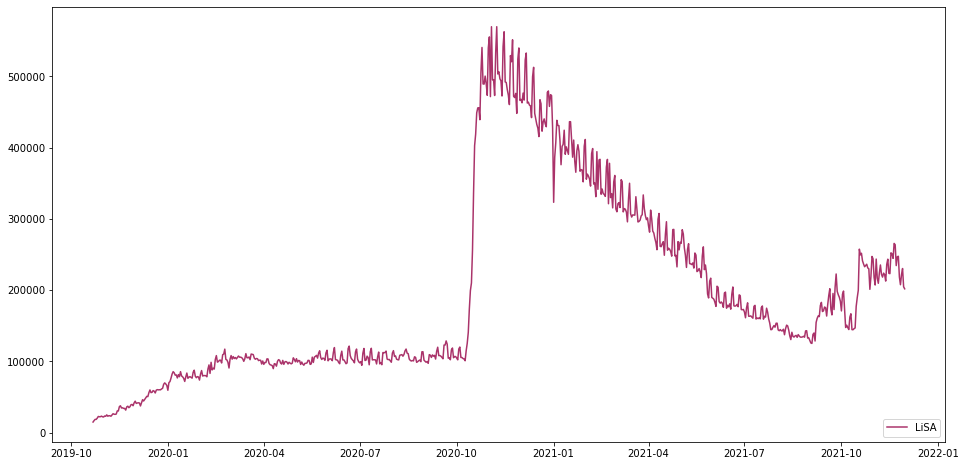

In [13]:
# Plot time series
fig = plt.figure(figsize=(16,8))

artists = 'LiSA'
#####################
#get top position of all charting songs of the artist per day
data1 = lisa_df[lisa_df['artist']==artists].groupby('date')[['streams']].sum()
plt.plot(data1, label=artists, color='#AA336A')

plt.legend(loc='lower right')
plt.ylabel('Daily Streams')
ax.set_xlim([datetime.date(2019, 10, 31), datetime.date(2021, 11, 30)])
plt.xlabel(None)
plt.ylabel(None)

## Audio Features

In [15]:
charts_df = pd.read_csv('data/japan_spotify_daily_charts_tracks.csv')
charts_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,84,0.748,0.524,8.0,-5.599,1.0,0.0338,0.4140,0.00000,0.1110,0.661,95.010
1,5GXAXm5YOmYT0kL5jHvYBt,I Feel It Coming,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,4AdZV63ycxFLF6Hcol0QnB,269186,2016-11-24,72,0.773,0.819,0.0,-5.946,0.0,0.1180,0.4260,0.00000,0.0679,0.585,92.990
2,4pdPtRcBmOSQDlJ3Fk945m,Let Me Love You,540vIaP2JwjQb9dm3aArA4,DJ Snake,55bbXORm6ZrVq52zfZnxBf,205946,2016-08-05,0,0.476,0.718,8.0,-5.309,1.0,0.0576,0.0784,0.00001,0.1220,0.142,199.864
3,6b8Be6ljOzmkOmFslEb23P,24K Magic,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,225983,2016-11-17,78,0.818,0.803,1.0,-4.282,1.0,0.0797,0.0340,0.00000,0.1530,0.632,106.970
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.3380,0.00000,0.0975,0.447,100.048


In [16]:
df = charts_df[charts_df['artist_name'].isin(['Official HIGE DANdism', 'Kenshi Yonezu', 'ENHYPEN', 'LiSA', 'Hikaru Utada'])]

In [17]:
df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
155,3HGTwcMgf0cyennr2giebW,花束を君に,7lbSsjYACZHn1MSDXPxNF2,Hikaru Utada,60eldei5NAr7QjPGr3Ei1B,278240,2016-09-28,0,0.521,0.539,4.0,-7.667,1.0,0.0290,0.5380,0.000000,0.307,0.358,81.979
252,3MmAtS5q33iKDcRvu6U5p3,First Love,7lbSsjYACZHn1MSDXPxNF2,Hikaru Utada,35p2ZEVvpzepatSZB0Jqra,257293,1999-03-10,0,0.452,0.437,7.0,-8.502,1.0,0.0374,0.1470,0.000000,0.149,0.190,179.841
450,0zHwzOAeXZkLfZGdclqAJ6,Flavor Of Life,7lbSsjYACZHn1MSDXPxNF2,Hikaru Utada,3ziRkpxFfVidJOkuldtzdJ,286986,2008-03-19,0,0.588,0.867,0.0,-5.403,0.0,0.0304,0.0902,0.000011,0.157,0.528,105.976
452,3iC2EnDtXJZj7aSi44HGGv,Wait & See ~リスク~,7lbSsjYACZHn1MSDXPxNF2,Hikaru Utada,5qKLgR6r4cFqK95gyhROTA,288733,2001-03-28,0,0.638,0.899,5.0,-2.297,0.0,0.0387,0.2090,0.000000,0.102,0.716,112.000
476,15HNdxGKNCIO9pgaY4n7FU,Pretender,5Vo1hnCRmCM6M4thZCInCj,Official HIGE DANdism,17gzvH2FPpVhpuqalLFi9j,326842,2019-08-31,58,0.538,0.869,8.0,-3.464,1.0,0.0275,0.0470,0.000000,0.140,0.369,91.972


In [18]:
df = df.groupby('artist_name')[['danceability', 'energy', 'valence']].mean()

In [19]:
df = pd.DataFrame(df)
df = df.reset_index()

### Danceability

Text(0, 0.5, '')

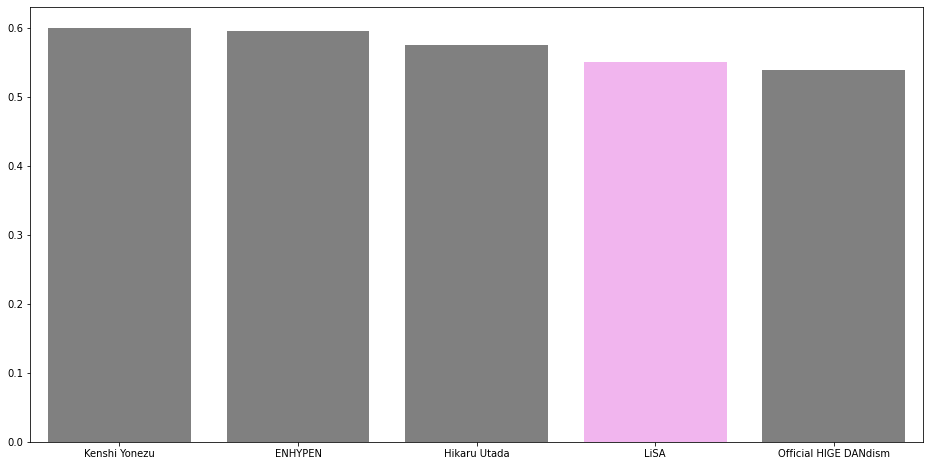

In [20]:
plt.figure(figsize=(16, 8))
ax = plt.subplot(111)

sns.barplot(x='artist_name', y='danceability', data=df, order=df.sort_values('danceability', ascending=False).artist_name,
           palette=['grey', 'grey', 'grey', '#fbabf7', 'grey'])
plt.xlabel(None)
plt.ylabel(None)

### Energy

Text(0, 0.5, '')

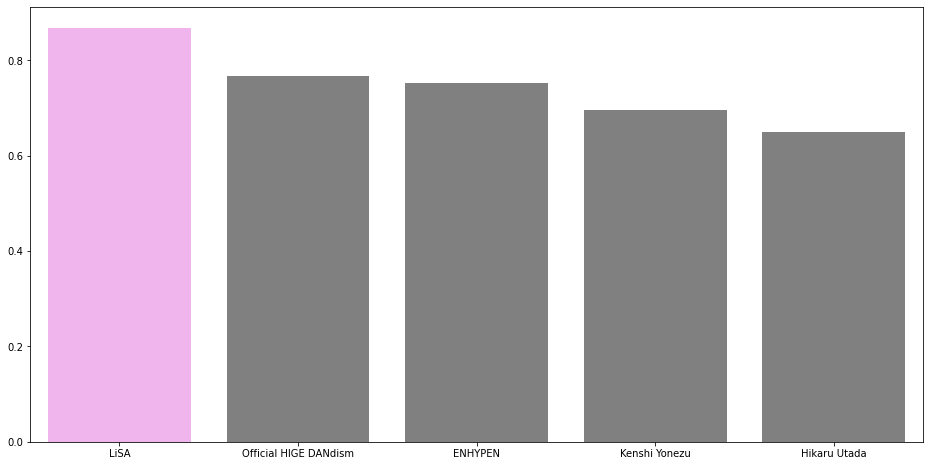

In [21]:
plt.figure(figsize=(16, 8))
ax = plt.subplot(111)

sns.barplot(x='artist_name', y='energy', data=df, order=df.sort_values('energy', ascending=False).artist_name,
           palette=['#fbabf7','grey', 'grey', 'grey', 'grey'])
plt.xlabel(None)
plt.ylabel(None)

### Valence

Text(0, 0.5, '')

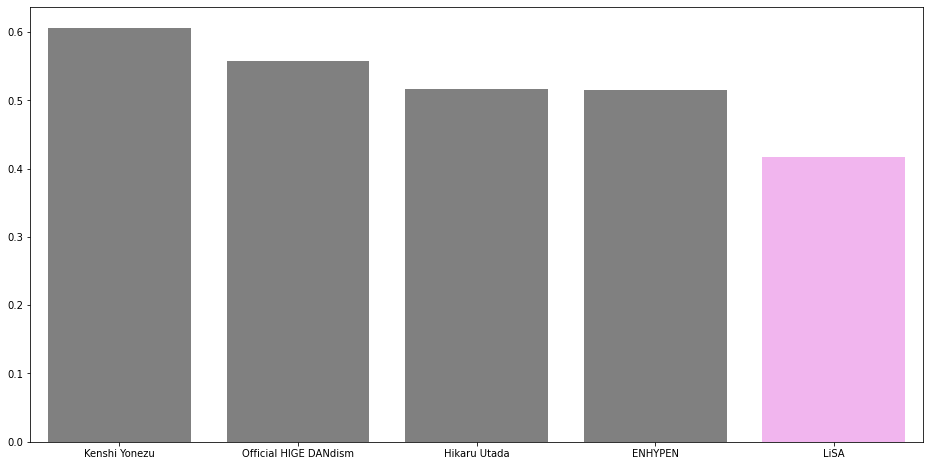

In [22]:
plt.figure(figsize=(16, 8))
ax = plt.subplot(111)

sns.barplot(x='artist_name', y='valence', data=df, order=df.sort_values('valence', ascending=False).artist_name,
           palette=['grey', 'grey', 'grey', 'grey', '#fbabf7'])
plt.xlabel(None)
plt.ylabel(None)

## Genre Classification

In [23]:
KEYWORD1='pop'
KEYWORD2='rap'
KEYWORD3='k-pop'

playlist1_df = pd.read_csv('data/playlists/'+KEYWORD1+'_jp_playlist_data.csv')
playlist2_df = pd.read_csv('data/playlists/'+KEYWORD2+'_jp_playlist_data.csv')
playlist3_df = pd.read_csv('data/playlists/'+KEYWORD3+'_jp_playlist_data.csv')

In [24]:
tracks1_df = pd.read_csv('data/playlists/'+KEYWORD1+'_jp_playlist_tracks_data.csv')
tracks1_df['duration_mins']=tracks1_df['duration']/60000
tracks1_df['genre']=KEYWORD1

tracks2_df = pd.read_csv('data/playlists/'+KEYWORD2+'_jp_playlist_tracks_data.csv')
tracks2_df['duration_mins']=tracks2_df['duration']/60000
tracks2_df['genre']=KEYWORD2

tracks3_df = pd.read_csv('data/playlists/'+KEYWORD3+'_jp_playlist_tracks_data.csv')
tracks3_df['duration_mins']=tracks3_df['duration']/60000
tracks3_df['genre']=KEYWORD3

### Compare histograms

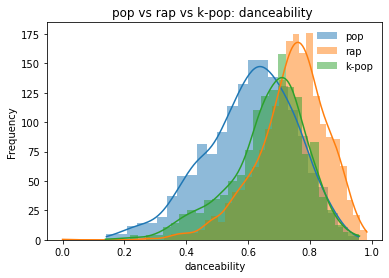

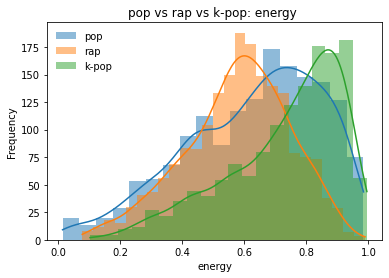

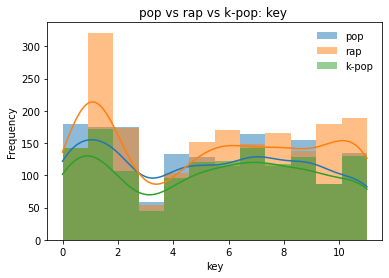

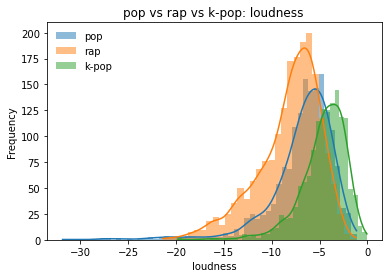

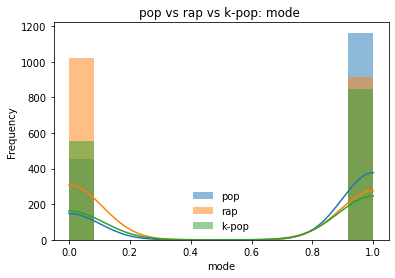

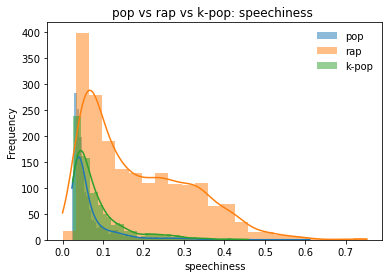

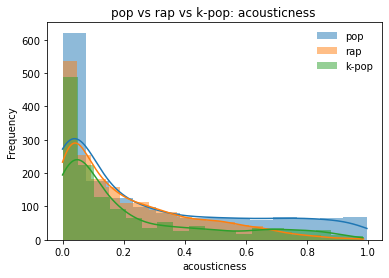

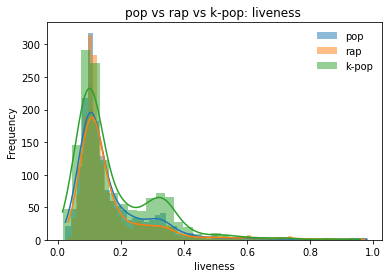

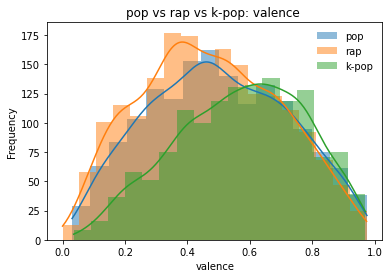

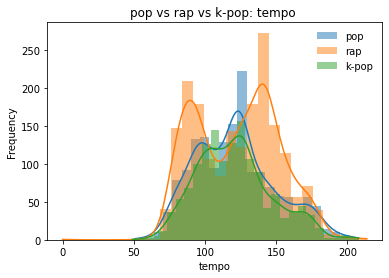

In [25]:
for col in ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'liveness', 'valence', 'tempo']:
    fig,ax = plt.subplots()
    
    sns.histplot(tracks1_df[col], ax=ax, label= KEYWORD1, kde=True, color='C0', edgecolor='None')
    sns.histplot(tracks2_df[col], ax=ax, label= KEYWORD2,  kde=True, color='C1', edgecolor='None')
    sns.histplot(tracks3_df[col], ax=ax, label= KEYWORD3,  kde=True, color='C2', edgecolor='None')
    plt.title("%s vs %s vs %s: %s " % (KEYWORD1,KEYWORD2, KEYWORD3,col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()


### Feature Engineering

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
tracks_df = pd.concat([tracks1_df,tracks2_df, tracks3_df])
tracks1_df.shape, tracks2_df.shape, tracks3_df.shape, tracks_df.shape

((1619, 23), (1936, 23), (1408, 23), (4963, 23))

In [28]:
tracks_df =tracks_df.drop_duplicates(subset='track_id')
tracks_df.shape

(4823, 23)

In [29]:
#Normalize loudness
tracks_df['loudness'] = scaler.fit_transform(tracks_df[['loudness']])
tracks_df['loudness'].describe()

count    4823.000000
mean        0.787957
std         0.109882
min         0.000000
25%         0.739611
50%         0.807525
75%         0.861970
max         1.000000
Name: loudness, dtype: float64

In [30]:
#Normalize tempo
tracks_df['tempo'] =  scaler.fit_transform(tracks_df[['tempo']])
#check
tracks_df['tempo'].describe()

count    4823.000000
mean        0.569004
std         0.131931
min         0.000000
25%         0.458612
50%         0.566524
75%         0.655174
max         1.000000
Name: tempo, dtype: float64

In [31]:
tracks_df["genre"] = tracks_df["genre"].astype('category')
tracks_df['genre_id'] = tracks_df["genre"].cat.codes
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre,genre_id
0,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,4dpARuHxo51G3z768sgnrY,Adele,224jZ4sUX7OhAuMwaxp86S,224694,2021-10-14,87,0.604,0.366,...,0.578,0.000000,0.1330,0.130,0.664257,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,3.744900,pop,1
1,0fioLzGM8ngbD1w6fMmm45,I'm Not The Only One,2wY79sveU1sp5g7SokKOiI,Sam Smith,2Jg7JZ0ZXOGje1bkq7CVgK,239316,2014-01-01,0,0.453,0.496,...,0.554,0.000027,0.0772,0.501,0.378930,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,3.988600,pop,1
2,6I3mqTwhRpn34SLVafSH7G,Ghost,1uNFoZAHBGtllmzznpCI3s,Justin Bieber,5dGWwsZ9iB2Xc3UKR0gif2,153190,2021-03-19,89,0.601,0.741,...,0.185,0.000029,0.4150,0.441,0.720301,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,2.553167,pop,1
3,1dGr1c8CrMLDpV6mPbImSI,Lover,06HL4z0CvFAxyc27GXpf02,Taylor Swift,1NAmidJlEaVgA3MpcPFYGq,221306,2019-08-23,83,0.359,0.543,...,0.492,0.000016,0.1180,0.453,0.320636,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,3.688433,pop,1
4,78nplE9X2ZGvQh3TKgvldE,Rewrite The Stars (with James Arthur & Anne-Ma...,4IWBUUAFIplrNtaOHcJPRM,James Arthur,4dPosP4Io4sDCmeiCxVHW0,218293,2018-11-16,65,0.670,0.743,...,0.237,0.000000,0.4650,0.571,0.589228,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,3.638217,pop,1


In [32]:
tracks_df['genre'].value_counts()

rap      1933
pop      1619
k-pop    1271
Name: genre, dtype: int64

In [33]:
genre_lookup = dict(tracks_df.groupby('genre_id').head(1)[['genre_id','genre']].sort_values('genre_id').values)
genre_lookup

{0: 'k-pop', 1: 'pop', 2: 'rap'}

In [34]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report,\
    ConfusionMatrixDisplay, plot_roc_curve

In [56]:
# create feature matrix (X)
# pick energy and tempo as features
feature_cols = ['danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
X = tracks_df[feature_cols]
y = tracks_df['genre_id']
print(len(X),len(y))

4823 4823


### Model Tuning: KNN

In [57]:
#check indices used in folds
KFOLDS=10
kf = KFold(n_splits=KFOLDS)
for i,(train, test) in enumerate(kf.split(X)):
    #generate indices to use for the k-fold splits
    full_range = np.arange(len(X)).tolist()
    gap = [x for x in full_range if x not in train]
    if (i>0)&(i<KFOLDS-1):
        print("K=%d, train idx: %d-%d, %d-%d (n=%d), test idx:  %d-%d (n=%d)" % (i, min(train), min(gap), max(gap), max(train),len(train),\
                                                                     min(test), max(test), len(test)))
    else:
         print("K=%d, train idx: %d-%d (n=%d), test idx:  %d-%d (n=%d)" % (i, min(train), max(train),len(train),\
                                                                     min(test), max(test), len(test)))

K=0, train idx: 483-4822 (n=4340), test idx:  0-482 (n=483)
K=1, train idx: 0-483, 965-4822 (n=4340), test idx:  483-965 (n=483)
K=2, train idx: 0-966, 1448-4822 (n=4340), test idx:  966-1448 (n=483)
K=3, train idx: 0-1449, 1930-4822 (n=4341), test idx:  1449-1930 (n=482)
K=4, train idx: 0-1931, 2412-4822 (n=4341), test idx:  1931-2412 (n=482)
K=5, train idx: 0-2413, 2894-4822 (n=4341), test idx:  2413-2894 (n=482)
K=6, train idx: 0-2895, 3376-4822 (n=4341), test idx:  2895-3376 (n=482)
K=7, train idx: 0-3377, 3858-4822 (n=4341), test idx:  3377-3858 (n=482)
K=8, train idx: 0-3859, 4340-4822 (n=4341), test idx:  3859-4340 (n=482)
K=9, train idx: 0-4340 (n=4341), test idx:  4341-4822 (n=482)


In [62]:
n_neighbors = np.arange(2,51)
KFOLDS = 5

cv_scores_mean = []
cv_scores_std = []

for K in n_neighbors:
    print('Fitting KNN with K=%d ...' % K, end='')
    #initialize model
    knn_model = KNeighborsClassifier(n_neighbors=K)
    # get accuracy metric across train-test sets generated using k-folds
    scores = cross_val_score(knn_model, X, y, cv=KFOLDS, scoring='accuracy')
    # overall accuracy score of K is mean of accuracy scores per k-fold
    # std dev of scores across folds must be a minimum
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    print('DONE!')

Fitting KNN with K=2 ...DONE!
Fitting KNN with K=3 ...DONE!
Fitting KNN with K=4 ...DONE!
Fitting KNN with K=5 ...DONE!
Fitting KNN with K=6 ...DONE!
Fitting KNN with K=7 ...DONE!
Fitting KNN with K=8 ...DONE!
Fitting KNN with K=9 ...DONE!
Fitting KNN with K=10 ...DONE!
Fitting KNN with K=11 ...DONE!
Fitting KNN with K=12 ...DONE!
Fitting KNN with K=13 ...DONE!
Fitting KNN with K=14 ...DONE!
Fitting KNN with K=15 ...DONE!
Fitting KNN with K=16 ...DONE!
Fitting KNN with K=17 ...DONE!
Fitting KNN with K=18 ...DONE!
Fitting KNN with K=19 ...DONE!
Fitting KNN with K=20 ...DONE!
Fitting KNN with K=21 ...DONE!
Fitting KNN with K=22 ...DONE!
Fitting KNN with K=23 ...DONE!
Fitting KNN with K=24 ...DONE!
Fitting KNN with K=25 ...DONE!
Fitting KNN with K=26 ...DONE!
Fitting KNN with K=27 ...DONE!
Fitting KNN with K=28 ...DONE!
Fitting KNN with K=29 ...DONE!
Fitting KNN with K=30 ...DONE!
Fitting KNN with K=31 ...DONE!
Fitting KNN with K=32 ...DONE!
Fitting KNN with K=33 ...DONE!
Fitting KNN with

The optimal number of neighbors is 12.00 with accuracy 0.6647


Text(0, 0.5, 'Accuracy standard deviation')

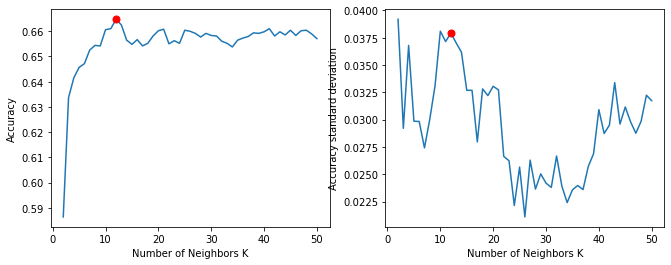

In [64]:
# determining best K
idx_max_accuracy = cv_scores_mean.index(max(cv_scores_mean))
optimal_K = n_neighbors[idx_max_accuracy]
print("The optimal number of neighbors is %0.2f with accuracy %0.4f" % (optimal_K, cv_scores_mean[idx_max_accuracy]))

# plot metrics 
fig,axs = plt.subplots(1,2, figsize=(11,4))
axs[0].plot(n_neighbors, cv_scores_mean)
axs[0].plot(optimal_K,max(cv_scores_mean), marker="o", ms=7, color='r')
axs[0].set_xlabel("Number of Neighbors K")
axs[0].set_ylabel("Accuracy")

axs[1].plot(n_neighbors, cv_scores_std)
axs[1].plot(optimal_K,cv_scores_std[idx_max_accuracy], marker="o", ms=7, color='r')
axs[1].set_xlabel("Number of Neighbors K")
axs[1].set_ylabel("Accuracy standard deviation")

In [65]:
#initialize KNN with optimal K
knn_optimal_model = KNeighborsClassifier(n_neighbors=optimal_K)
# fitting the model with entire dataset
knn_optimal_model.fit(X, y)
#use model to predict y
knn_ypred = knn_optimal_model.predict(X)

In [66]:
# evaluate accuracy
acc = accuracy_score(y, knn_ypred) * 100
print('\nThe accuracy of the knn classifier for the full dataset using k = %d is %f%%' % (optimal_K, acc))


The accuracy of the knn classifier for the full dataset using k = 12 is 74.372797%


### Model Tuning: SVM

In [67]:
def plot_scores(cv_scores_mean,cv_scores_std):
    fig,axs = plt.subplots(1,2, figsize=(11,4))
    
    x = np.arange(len(cv_scores_mean))
    max_mean_score_idx = cv_scores_mean.argmax()
    
    axs[0].plot(x, cv_scores_mean, marker='.', lw=0)
    axs[0].plot(x[max_mean_score_idx],max(cv_scores_mean), marker="o", ms=7, color='r')
    axs[0].set_xlabel("Model config type")
    axs[0].set_ylabel("Accuracy")

    axs[1].plot(x, cv_scores_std, marker='.', lw=0)
    axs[1].plot(x[max_mean_score_idx],cv_scores_std[max_mean_score_idx], marker="o", ms=7, color='r')
    axs[1].set_xlabel("Model config type")
    axs[1].set_ylabel("Accuracy standard deviation")

In [68]:
#Linear model
print('Fitting SVM with linear kernel...')

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS )
# fitting the model for grid search
grid.fit(X, y)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model1 = grid.best_estimator_
# fit model for entire data
svm_model1.fit(X, y)
pred1 = svm_model1.predict(X)
acc = accuracy_score(y, pred1) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with linear kernel...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best model config score is 67.738396% (vs. overall mean score: 66.141883 )
Std of best model score across folds is 0.027918 (vs. overall mean std: 0.026572 )
The accuracy of the SVM classifier for the full dataset is 70.454074%
DONE!


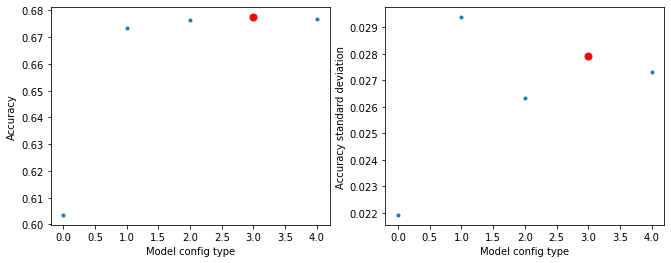

In [69]:
plot_scores(cv_scores_mean,cv_scores_std)

In [70]:
# defining parameter range
print('Fitting SVM with a polynomial kernel...')

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'degree': [2,3,5],
              'kernel': ['poly']}
#1 worker:  12 mins
#2 workers: 8.6 mins
#3 workers: 7.1 mins
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS, n_jobs=2)
# fitting the model for grid search
grid.fit(X, y)
print('Best model is %s' % grid.best_estimator_)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model2 = grid.best_estimator_
# fit model for entire data
svm_model2.fit(X, y)
pred2 = svm_model2.predict(X)
acc = accuracy_score(y, pred2) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with a polynomial kernel...
Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best model is SVC(C=10, gamma=1, kernel='poly')
Best model config score is 69.894890% (vs. overall mean score: 49.966077 )
Std of best model score across folds is 0.034337 (vs. overall mean std: 0.013337 )
The accuracy of the SVM classifier for the full dataset is 73.108024%
DONE!


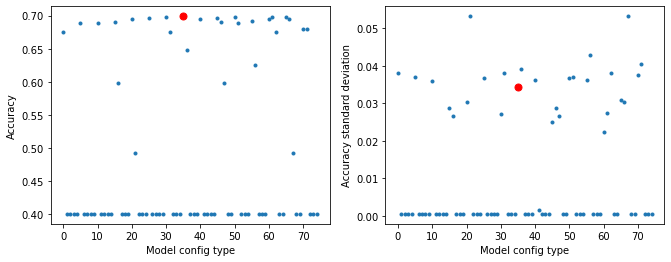

In [71]:
plot_scores(cv_scores_mean,cv_scores_std)

In [72]:
# defining parameter range
print('Fitting SVM with an rbf kernel...')

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS, n_jobs=2)
# fitting the model for grid search
grid.fit(X, y)
print('Best model is %s' % grid.best_estimator_)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model3 = grid.best_estimator_
# fit model for entire data
svm_model3.fit(X, y)
pred3 = svm_model3.predict(X)
acc = accuracy_score(y, pred3) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with an rbf kernel...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best model is SVC(C=100, gamma=1)
Best model config score is 70.039559% (vs. overall mean score: 59.184232 )
Std of best model score across folds is 0.026058 (vs. overall mean std: 0.019520 )
The accuracy of the SVM classifier for the full dataset is 74.517935%
DONE!


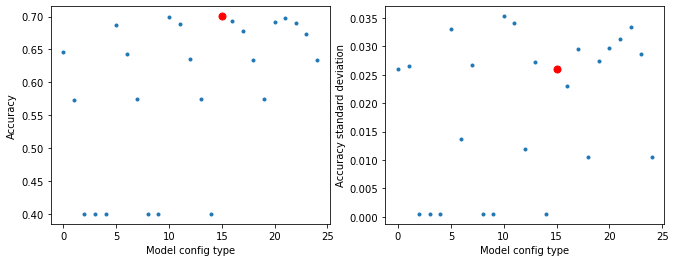

In [73]:
plot_scores(cv_scores_mean,cv_scores_std)

Select best SVM model

In [74]:
svm_optimal_model = svm_model3
#set probability=True to view classification probabilities and refit
svm_optimal_model.probability=True
svm_optimal_model.fit(X, y)
#use model to predict y
svm_ypred = svm_optimal_model.predict(X)

### Model Selection

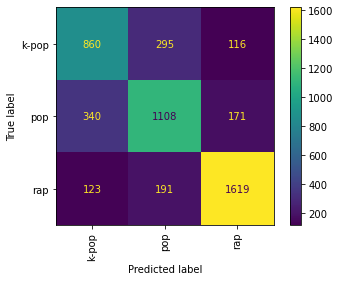

In [75]:
cm = confusion_matrix(y, knn_ypred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(genre_lookup.values()))
cmd.plot(xticks_rotation=90)

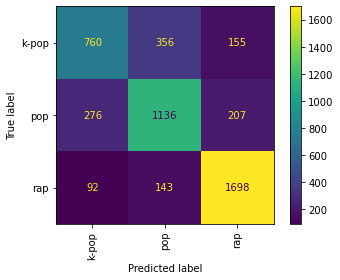

In [76]:
cm = confusion_matrix(y, svm_ypred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(genre_lookup.values()))
cmd.plot(xticks_rotation=90)

In [77]:
print('-------------------------------------------------------------')
print('KNN')
print(classification_report(y,knn_ypred))
print('-------------------------------------------------------------')
print('SVM')
print(classification_report(y,svm_ypred))

-------------------------------------------------------------
KNN
              precision    recall  f1-score   support

           0       0.65      0.68      0.66      1271
           1       0.70      0.68      0.69      1619
           2       0.85      0.84      0.84      1933

    accuracy                           0.74      4823
   macro avg       0.73      0.73      0.73      4823
weighted avg       0.75      0.74      0.74      4823

-------------------------------------------------------------
SVM
              precision    recall  f1-score   support

           0       0.67      0.60      0.63      1271
           1       0.69      0.70      0.70      1619
           2       0.82      0.88      0.85      1933

    accuracy                           0.75      4823
   macro avg       0.73      0.73      0.73      4823
weighted avg       0.74      0.75      0.74      4823



Choose optimal model

In [87]:
optimal_model = svm_optimal_model

In [78]:
optimal_model1 = knn_optimal_model

In [79]:
optimal_model2 = svm_model3

In [80]:
import pickle

In [81]:
pickle.dump(optimal_model1, open('knn_model.pkl', 'wb'))

In [82]:
pickle.dump(optimal_model2, open('svm_rbf_model.pkl', 'wb'))

## Create recommender engine pool

In [83]:
chart_tracks_df = pd.read_csv("data/japan_spotify_daily_charts_tracks.csv")
chart_tracks_df = chart_tracks_df.dropna().reset_index(drop=True)
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,84,0.748,0.524,8.0,-5.599,1.0,0.0338,0.4140,0.00000,0.1110,0.661,95.010
1,5GXAXm5YOmYT0kL5jHvYBt,I Feel It Coming,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,4AdZV63ycxFLF6Hcol0QnB,269186,2016-11-24,72,0.773,0.819,0.0,-5.946,0.0,0.1180,0.4260,0.00000,0.0679,0.585,92.990
2,4pdPtRcBmOSQDlJ3Fk945m,Let Me Love You,540vIaP2JwjQb9dm3aArA4,DJ Snake,55bbXORm6ZrVq52zfZnxBf,205946,2016-08-05,0,0.476,0.718,8.0,-5.309,1.0,0.0576,0.0784,0.00001,0.1220,0.142,199.864
3,6b8Be6ljOzmkOmFslEb23P,24K Magic,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,225983,2016-11-17,78,0.818,0.803,1.0,-4.282,1.0,0.0797,0.0340,0.00000,0.1530,0.632,106.970
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.3380,0.00000,0.0975,0.447,100.048


In [84]:
#scale loudness and tempo
chart_tracks_df['loudness'] = scaler.fit_transform(chart_tracks_df[['loudness']])
chart_tracks_df['tempo'] =  scaler.fit_transform(chart_tracks_df[['tempo']])

In [88]:
chart_tracks_df['predicted_genre_id'] = chart_tracks_df.apply(lambda x:  optimal_model.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
chart_tracks_df['predicted_genre'] = chart_tracks_df['predicted_genre_id'].apply(lambda x: genre_lookup[x])
chart_tracks_df['predicted_genre_prob'] = chart_tracks_df.apply(lambda x:  np.max(optimal_model.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
chart_tracks_df['all_genre_prob'] = chart_tracks_df.apply(lambda x:  optimal_model.predict_proba(x[feature_cols].values.reshape(1,-1))[0]\
                                                    , axis=1)

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: 

In [89]:
#explode genre probabilities into separate columns
charts_predicted_genre_prob = pd.DataFrame(chart_tracks_df["all_genre_prob"].to_list(),
                                           columns=['predicted_'+g+'_prob' for g in genre_lookup.values()])
charts_predicted_genre_prob['track_id'] = chart_tracks_df['track_id']
chart_tracks_df = pd.merge(chart_tracks_df,charts_predicted_genre_prob, how='left', on='track_id')
chart_tracks_df = chart_tracks_df.drop(columns='all_genre_prob')
chart_tracks_df = chart_tracks_df.sort_values('predicted_genre_prob', ascending=False)
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre,predicted_genre_prob,predicted_k-pop_prob,predicted_pop_prob,predicted_rap_prob
1404,4uloft7ZE54WflsuqFmjC7,Elevate,3TVXtAsR1Inumwj472S9r4,Drake,2o9McLtDM7mbODV7yZF2mc,184960,2018-06-29,0,0.755,0.470,...,0.000000,0.118,0.0604,0.225526,2,rap,0.999999,3.456680e-07,3.690210e-07,0.999999
3302,6skTvnm735GYcgiKaeDDPq,It's Christmas Time (feat. Dan Caplen),3JhNCzhSMTxs9WLGJJxWOY,Macklemore,4yaTdtVKfwkMmX9JrN2O79,198920,2019-12-12,33,0.636,0.536,...,0.005970,0.152,0.3110,0.274606,2,rap,0.999994,3.239667e-06,2.771711e-06,0.999994
1394,71SEHJPt1iDwGkBhUOAXDP,Survival,3TVXtAsR1Inumwj472S9r4,Drake,2o9McLtDM7mbODV7yZF2mc,136186,2018-06-29,0,0.685,0.593,...,0.000000,0.123,0.1440,0.273726,2,rap,0.999987,6.219297e-06,6.365492e-06,0.999987
1331,6T8cJz5lAqGer9GUHGyelE,God's Plan,3TVXtAsR1Inumwj472S9r4,Drake,2YDNDwQvsU0njt7Kq0xNRY,198960,2018-01-20,0,0.755,0.448,...,0.000033,0.514,0.3180,0.231743,2,rap,0.997350,5.849415e-04,2.064799e-03,0.997350
1386,2VWbHHhWnMzKWPUs4IEEW9,God's Plan,3TVXtAsR1Inumwj472S9r4,Drake,2o9McLtDM7mbODV7yZF2mc,198973,2018-06-29,0,0.754,0.449,...,0.000078,0.550,0.3500,0.231677,2,rap,0.996153,8.679826e-04,2.979513e-03,0.996153


In [90]:
chart_tracks_df[['track_name']+[c for c in chart_tracks_df.columns if 'predicted_' in c]]

,track_name,predicted_genre_id,predicted_genre,predicted_genre_prob,predicted_k-pop_prob,predicted_pop_prob,predicted_rap_prob
1404,Elevate,2,rap,0.999999,3.456680e-07,3.690210e-07,0.999999
3302,It's Christmas Time (feat. Dan Caplen),2,rap,0.999994,3.239667e-06,2.771711e-06,0.999994
1394,Survival,2,rap,0.999987,6.219297e-06,6.365492e-06,0.999987
1331,God's Plan,2,rap,0.997350,5.849415e-04,2.064799e-03,0.997350
1386,God's Plan,2,rap,0.996153,8.679826e-04,2.979513e-03,0.996153
...,...,...,...,...,...,...,...
3445,Whippin (feat. Felix Snow),0,k-pop,0.359571,3.474434e-01,2.929856e-01,0.359571
767,MIC Drop,2,rap,0.359472,2.892787e-01,3.594716e-01,0.351250
3548,Horizon,2,rap,0.357019,3.248325e-01,3.181482e-01,0.357019
795,世界はあなたに笑いかけている,2,rap,0.348693,3.466841e-01,3.046231e-01,0.348693


In [91]:
chart_tracks_df['predicted_genre'].value_counts()

pop      3255
rap      1206
k-pop     658
Name: predicted_genre, dtype: int64

<AxesSubplot:>

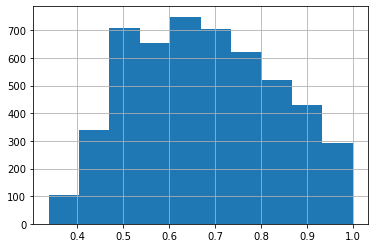

In [92]:
#View histogram of probabilities
chart_tracks_df['predicted_genre_prob'].hist()

In [93]:
#Check tracks classified with higher probability
chart_tracks_df[chart_tracks_df['predicted_genre']=='pop'][['track_name','artist_name','predicted_genre','predicted_genre_prob']]\
            .sort_values(['predicted_genre_prob'],ascending=False)[:10]

,track_name,artist_name,predicted_genre,predicted_genre_prob
4454,クリスマス・イブ,Tatsuro Yamashita,pop,0.994421
250,その線は水平線,Quruli,pop,0.988752
4094,恋と病熱,Kenshi Yonezu,pop,0.986198
4438,はしりがき,Macaroni Empitsu,pop,0.980294
4097,結んで開いて羅刹と骸 - ORIGINAL,hachi,pop,0.978473
841,Kimishidai Ressha,ONE OK ROCK,pop,0.978245
1899,キミシダイ列車,ONE OK ROCK,pop,0.978245
4932,人生は夢だらけ,Sheena Ringo,pop,0.976937
906,いいんですか?,RADWIMPS,pop,0.974273
1102,Marshmallow day,Mr.Children,pop,0.974239


In [94]:
#Check tracks classified with higher probability
chart_tracks_df[chart_tracks_df['predicted_genre']=='rap'][['track_name','artist_name','predicted_genre','predicted_genre_prob']]\
            .sort_values(['predicted_genre_prob'],ascending=False)[:10]

,track_name,artist_name,predicted_genre,predicted_genre_prob
1404,Elevate,Drake,rap,0.999999
3302,It's Christmas Time (feat. Dan Caplen),Macklemore,rap,0.999994
1394,Survival,Drake,rap,0.999987
1331,God's Plan,Drake,rap,0.997350
1386,God's Plan,Drake,rap,0.996153
1441,God's Plan,Drake,rap,0.996025
4617,Bank Account,21 Savage,rap,0.995945
3047,Bank Account,21 Savage,rap,0.995945
139,God's Plan,Drake,rap,0.995692
1487,Praise The Lord (Da Shine) (feat. Skepta),A$AP Rocky,rap,0.995267


In [95]:
#Check tracks classified with higher probability
chart_tracks_df[chart_tracks_df['predicted_genre']=='k-pop'][['track_name','artist_name','predicted_genre','predicted_genre_prob']]\
            .sort_values(['predicted_genre_prob'],ascending=False)[:10]

,track_name,artist_name,predicted_genre,predicted_genre_prob
3231,"I See Fire - From ""The Hobbit - The Desolation...",Ed Sheeran,k-pop,0.946196
3429,Everlasting,banvox,k-pop,0.939135
4861,"Koi, Hajikemashita",YUZU,k-pop,0.930707
4675,恋、弾けました。,YUZU,k-pop,0.926294
3659,Free Me,Sia,k-pop,0.889156
3840,踊,Ado,k-pop,0.842910
1622,Secret Story of the Swan,IZ*ONE,k-pop,0.839143
2085,キュン,Hinatazaka46,k-pop,0.837469
2706,Doors ~勇気の軌跡~,ARASHI,k-pop,0.834548
305,Occasion,banvox,k-pop,0.827516


In [96]:
#Check tracks classified with lower probability
chart_tracks_df[chart_tracks_df['predicted_genre']=='pop'][['track_name','artist_name','predicted_genre','predicted_genre_prob']]\
            .sort_values(['predicted_genre_prob'],ascending=True)[:10]

,track_name,artist_name,predicted_genre,predicted_genre_prob
159,How Long,Charlie Puth,pop,0.361360
532,Never Grow Up,CHANMINA,pop,0.361483
2416,Never Grow Up,CHANMINA,pop,0.361483
322,All Time Low,Jon Bellion,pop,0.363756
3016,"Know No Better (feat. Travis Scott, Camila Cab...",Major Lazer,pop,0.365960
429,I Miss You,Grey,pop,0.366812
2428,"fuck, i'm lonely",Lauv,pop,0.367479
4786,U+Me=LOVE,7 LOVE Minutes,pop,0.367754
353,We Don’t Need to Talk Anymore,w-inds.,pop,0.368574
2292,STUCK IN MY HEAD,TWICE,pop,0.369032


In [97]:
#Check tracks classified with lower probability
chart_tracks_df[chart_tracks_df['predicted_genre']=='rap'][['track_name','artist_name','predicted_genre','predicted_genre_prob']]\
            .sort_values(['predicted_genre_prob'],ascending=True)[:10]

,track_name,artist_name,predicted_genre,predicted_genre_prob
795,世界はあなたに笑いかけている,Little Glee Monster,rap,0.348693
3548,Horizon,Alfred Beach Sandal,rap,0.357019
767,MIC Drop,BTS,rap,0.359472
1478,Bye Bye Boy,KIRA,rap,0.360654
1269,Sangria Wine,Pharrell Williams,rap,0.367515
3700,High Without Your Love,Loote,rap,0.367981
975,MIC Drop - Japanese ver.,BTS,rap,0.372164
1450,空扉,Nogizaka46,rap,0.372517
443,Tip Toe (feat. French Montana),Jason Derulo,rap,0.373331
4591,FUSHIGI,Gen Hoshino,rap,0.374224


In [98]:
#Check tracks classified with lower probability
chart_tracks_df[chart_tracks_df['predicted_genre']=='k-pop'][['track_name','artist_name','predicted_genre','predicted_genre_prob']]\
            .sort_values(['predicted_genre_prob'],ascending=True)[:10]

,track_name,artist_name,predicted_genre,predicted_genre_prob
3121,Wicked Girls,Kumi Koda,k-pop,0.337193
3445,Whippin (feat. Felix Snow),Kiiara,k-pop,0.359571
1074,comrade,SOIL & “PIMP” SESSIONS,k-pop,0.360776
920,comrade,SOIL & “PIMP” SESSIONS,k-pop,0.360776
88,Uptown Funk (feat. Bruno Mars),Mark Ronson,k-pop,0.367127
2699,青空の下、キミのとなり,ARASHI,k-pop,0.374221
1062,Bang Bang,Jessie J,k-pop,0.374270
768,Starving,Hailee Steinfeld,k-pop,0.374584
2992,Every Hour,Kanye West,k-pop,0.378490
1750,Bang Bang,Jessie J,k-pop,0.378845


In [99]:
chart_tracks_df.to_csv("data/for_sprint/japan_spotify_daily_charts_tracks_rec_pool.csv", index=False, encoding='utf-8')

In [ ]:
import pickle

In [ ]:
pickle.dump(optimal_model, open('model.pkl', 'wb'))